# Project: Investigate a Dataset No-show Appointments
## Table of Contents
<ul>
<li><a href="#Datainfo">Data Info</a></li>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='Datainfo'></a>
## Data Info
A number of characteristics about the patient are included in each row.
* **PatientId** - Identification of a patient 
* **AppointmentID** - Identification of each appointment 
* **Gender** - = Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man. 
* **ScheduledDay** - The day of the actuall appointment. 
* **AppointmentDay** - The day someone/patient called or registered the appointment
* **Age** - How old is the patient. 
* **Neighbourhood** - Where the appointment takes place. 
* **Scholarship** - Ture of False. It indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* **Hipertension** - True or False 
* **Diabetes** - True or False 
* **Alcoholism** - True or False 
* **Handcap** - True or False 
* **SMS_received** - 1 or more messages sent to the patient. 
* **No-show** - Yes or No.**** It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.****

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 
### The following questions will be addressed in this project:
* **Question 1: What is the proportion of appointment that are "Show up" and "No show"?**

* **Question 2: What is the age distribution of "Show up" and  "No show"?**

* **Question 3: Which neighborhoods have the highest number of "Show up" and "No show"?**

* **Question 4: How many "no-shows" and "show up" groups who have received SMS reminders?**

* **Question 5: Do scheduled or appointment no-shows occur on specific days of the week?**

* **Question 6: What is the distribution of patient health of "No show" and "Show up" groups?**

* **Question 7: What is the trend of elapsed time of patients with No show?**

In [1]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import datetime as dt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# import data into dataframe
df = pd.read_csv("/Users/irene/Desktop/DAFD Office/Project_3_Investigate a Dataset/KaggleV2-May-2016.csv")

In [3]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# view dimensions of dataset
df.shape

(110527, 14)

There are 110527 of patient info and 14 attributes.

### Finding#1: 
* Some typo found in data columns.

In [5]:
#Rename columns with typo or proper name
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'No_show'},inplace=True)

In [6]:
# To see what the data set looks like, I will use the head() method.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# Show info 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
# Check 'Handicap' column
df['Handicap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

There are four levels of Handicap 

### Finding#2:
In "Age" column:
the min age is showed negative values,
while the max age is showed 115. It's abnormal. So, I will discard them for data analyse.

In [9]:
# Discard abnormal age, set the range of ages within 0 to 100
df = df[(df['Age']>=0) & (df['Age']<100)]

In [10]:
# Check again info
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105150e+05,1.105150e+05,110515.000000,110515.000000,110515.000000,110515.000000,110515.000000,110515.000000,110515.000000
mean,1.474906e+14,5.675302e+06,37.082242,0.098276,0.197258,0.071873,0.030403,0.022196,0.321042
std,2.560860e+14,7.129649e+04,23.100482,0.297689,0.397931,0.258278,0.171695,0.161391,0.466879
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172848e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725518e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,99.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Check with missing data?
Steps for working with missing data:
* identify missing data
* deal with missing data
* correct data format

In [11]:
# view missing value count for each features
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No_show           0
dtype: int64

There are no missing values in this dataset.

### Data Cleaning 

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# view missing value count for each feature in 2008

# print number of duplicates dataset
print(df.duplicated().sum())

0


There are no duplicate data.

*** After checking no duplicate and null data, "PatientId" and "AppointmentID" columns are likely no more interest, I will discard these two columns for data analyse.*** 

In [13]:
# Remove "PatientId" and "AppointmentID" columns
df.drop(labels=['PatientId','AppointmentID'],axis=1,inplace=True)

### Correct data format

In Pandas, we use
.dtype() to check the data type
.astype() to change the data type

In [14]:
#list the data types for each column
df.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hypertension       int64
Diabetes           int64
Alcoholism         int64
Handicap           int64
SMS_received       int64
No_show           object
dtype: object

There are now 12 attributes in dataset.

*** As we can see above, some columns are not of the correct data type. So we changed "ScheduledDay" and  "AppointmentDay" column to datetime.***

### Convert data types to proper format

In [15]:
# Changed schedule_day column to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [16]:
# Ignoring the time portion of scheduleDay
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: x.strftime('%m-%d-%Y')) 

In [17]:
# Changed appointment_day column to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [18]:
# Ignoring the time portion of AppointmentDay
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: x.strftime('%m-%d-%Y')) 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110515 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110515 non-null object
ScheduledDay      110515 non-null object
AppointmentDay    110515 non-null object
Age               110515 non-null int64
Neighbourhood     110515 non-null object
Scholarship       110515 non-null int64
Hypertension      110515 non-null int64
Diabetes          110515 non-null int64
Alcoholism        110515 non-null int64
Handicap          110515 non-null int64
SMS_received      110515 non-null int64
No_show           110515 non-null object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


In [20]:
# Changed schedule_day column to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
# Changed appointment_day column to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

### Created "ScheduledDow" and"AppointmentDow" columns for day of week analysis

In [21]:
# Created a appointment_dow column for day of week analysis
df['ScheduleDow'] = df['ScheduledDay'].dt.weekday_name
df['AppointmentDow'] = df['AppointmentDay'].dt.weekday_name
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110515 entries, 0 to 110526
Data columns (total 14 columns):
Gender            110515 non-null object
ScheduledDay      110515 non-null datetime64[ns]
AppointmentDay    110515 non-null datetime64[ns]
Age               110515 non-null int64
Neighbourhood     110515 non-null object
Scholarship       110515 non-null int64
Hypertension      110515 non-null int64
Diabetes          110515 non-null int64
Alcoholism        110515 non-null int64
Handicap          110515 non-null int64
SMS_received      110515 non-null int64
No_show           110515 non-null object
ScheduleDow       110515 non-null object
AppointmentDow    110515 non-null object
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 12.6+ MB


There are now 14 attributes in the dataset.

<a id='eda'></a>
## Exploratory Data Analysis

### What are the characteristics of No_show? Have they changed over time?

We can analyze this by filtering each dataframe by No_show classification and exploring these datasets.

In [22]:
#  labels for No_show
df.No_show.unique()

array(['No', 'Yes'], dtype=object)

### Created a new column to store time between scheduling and appointment

In [23]:
df['ElapsedDays'] = df['AppointmentDay'] - df['ScheduledDay']

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110515 entries, 0 to 110526
Data columns (total 15 columns):
Gender            110515 non-null object
ScheduledDay      110515 non-null datetime64[ns]
AppointmentDay    110515 non-null datetime64[ns]
Age               110515 non-null int64
Neighbourhood     110515 non-null object
Scholarship       110515 non-null int64
Hypertension      110515 non-null int64
Diabetes          110515 non-null int64
Alcoholism        110515 non-null int64
Handicap          110515 non-null int64
SMS_received      110515 non-null int64
No_show           110515 non-null object
ScheduleDow       110515 non-null object
AppointmentDow    110515 non-null object
ElapsedDays       110515 non-null timedelta64[ns]
dtypes: datetime64[ns](2), int64(7), object(5), timedelta64[ns](1)
memory usage: 13.5+ MB


### Creating a dataframe of all no show up records

*** Convert it to a timedelta with a day precision.***

In [25]:
No_ShowUp = df.query('No_show == "Yes"')
Days = No_ShowUp['ElapsedDays'].mean()
timeframe_nos = Days / np.timedelta64(1, 'D')

### Creating dataframe of all show up records

In [26]:
ShowUp = df.query('No_show == "No"')
Days = ShowUp['ElapsedDays'].mean()
timeframe_shows = Days / np.timedelta64(1, 'D')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110515 entries, 0 to 110526
Data columns (total 15 columns):
Gender            110515 non-null object
ScheduledDay      110515 non-null datetime64[ns]
AppointmentDay    110515 non-null datetime64[ns]
Age               110515 non-null int64
Neighbourhood     110515 non-null object
Scholarship       110515 non-null int64
Hypertension      110515 non-null int64
Diabetes          110515 non-null int64
Alcoholism        110515 non-null int64
Handicap          110515 non-null int64
SMS_received      110515 non-null int64
No_show           110515 non-null object
ScheduleDow       110515 non-null object
AppointmentDow    110515 non-null object
ElapsedDays       110515 non-null timedelta64[ns]
dtypes: datetime64[ns](2), int64(7), object(5), timedelta64[ns](1)
memory usage: 13.5+ MB


### Creating a dataframe for plotting data types

### Convert "No_show" column from string to int so it can be plotted in charts

In [28]:
df["No_show"] = np.where((df.No_show=="Yes"), 1, 0)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,ScheduleDow,AppointmentDow,ElapsedDays
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday,Friday,0 days
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday,Friday,0 days
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday,Friday,0 days
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday,Friday,0 days
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday,Friday,0 days


In [29]:
df.to_csv('KaggleV2_edited.csv', index=False)

### Research Question 1: What is the proportion of appointment that are "Show up" and  "No show"?

In [30]:
new_df = df.groupby('No_show')['No_show'].agg(['count'])
new_df.reset_index(inplace=True)
new_df.columns = ['Appointment_status', 'Total']
new_df.iloc[0,0] = "Show Up"
new_df.iloc[1,0] = "No ShowUp"

In [31]:
show_prop = new_df.iloc[0,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])
noshow_prop = new_df.iloc[1,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])

In [32]:
new_df['proportion'] = [show_prop,noshow_prop]
new_df.head()

,Appointment_status,Total,proportion
0,Show Up,88199,0.798073
1,No ShowUp,22316,0.201927


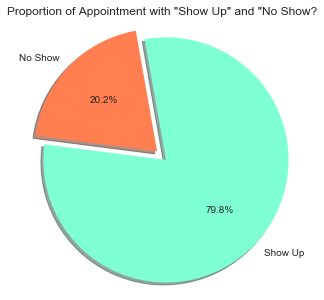

In [33]:
# Plot data
labels = ['No Show', 'Show Up']
sizes = [noshow_prop, show_prop]
colors = ['coral', 'aquamarine']
explode = (0, 0.1)

# The plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=100)
plt.title('Proportion of Appointment with "Show Up" and "No Show?')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

### Answer 1:
*** There are nearly 80% of patients show up their appointment. And 20% of patients did not showed up their appointment.***

### Research Question 2: What is the age distribution of "Show up" and  "No show"?

In [34]:
age_df = df.groupby('No_show').Age.mean()
age_df

No_show
0    37.784476
1    34.306820
Name: Age, dtype: float64

*** The average age of "No show" and "Show up" patients are 34.3 and 37.8, respectively.***

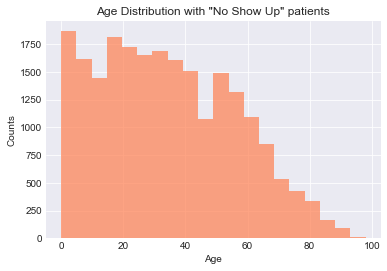

In [35]:
# Then separate "No show Up" group for analysis their age distribution
age_df_no_show = No_ShowUp['Age']
# Plot"No show" group 
plt.hist(age_df_no_show, stacked=True, bins=20, alpha=.7,color='coral')
plt.title('Age Distribution with "No Show Up" patients')
plt.xlabel('Age')
plt.ylabel('Counts');

*** It shows a bit of right-skewed distribution. As there is a long tail in older age.***

In [36]:
age_df_no_show.describe()

count    22316.000000
mean        34.306820
std         21.947486
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max         98.000000
Name: Age, dtype: float64

In [37]:
age_df_no_show.median()

33.0

In [38]:
age_df_no_show.mode()

0    0
dtype: int64

In no show group, the average age is 34.3 with standard derivation 21.9. Median and mode are 33 and 0, respectively.

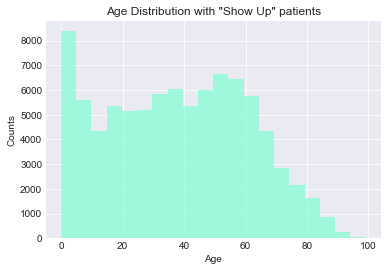

In [39]:
# Then separate "Show Up" group for analysis their age distribution
age_df_showup = ShowUp['Age']
# Plot"Show Up" group 
plt.hist(age_df_showup, stacked=True, bins=20, alpha=.7,color='aquamarine')
plt.title('Age Distribution with "Show Up" patients')
plt.xlabel('Age')
plt.ylabel('Counts');

In [40]:
age_df_showup.describe()

count    88199.000000
mean        37.784476
std         23.331042
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max         99.000000
Name: Age, dtype: float64

In [41]:
age_df_showup.median()

38.0

In [42]:
age_df_showup.mode()

0    0
dtype: int64

*** In show up group, the average age is 38 with standard derivation 23.3. Median and mode are 38 and 0, respectively.***

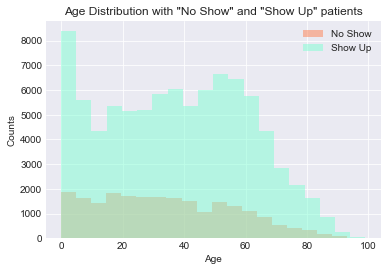

In [43]:
plt.hist(age_df_no_show, stacked=True, bins=20, alpha=.5,color='coral',label='No Show')
plt.hist(age_df_showup, stacked=True, bins=20, alpha=.5,color='aquamarine', label='Show Up')
plt.title('Age Distribution with "No Show" and "Show Up" patients')
plt.xlabel('Age')
plt.ylabel('Counts');
# legend
plt.legend();

*** When combined with two histograms, they showed similar patterns. ***

### Research Question 3: Which neighborhoods have the highest number of "Show up" and  "No show"?

In [44]:
shows_neigh = ShowUp.groupby("Neighbourhood")["No_show"].count().reset_index(name="count").sort_values("count", ascending=False)
#Show Top 5
shows_neigh.head(5)

,Neighbourhood,count
37,JARDIM CAMBURI,6252
42,MARIA ORTIZ,4585
58,RESISTÊNCIA,3525
38,JARDIM DA PENHA,3246
65,SANTA MARTHA,2635


#### Word-Cloud Visualization

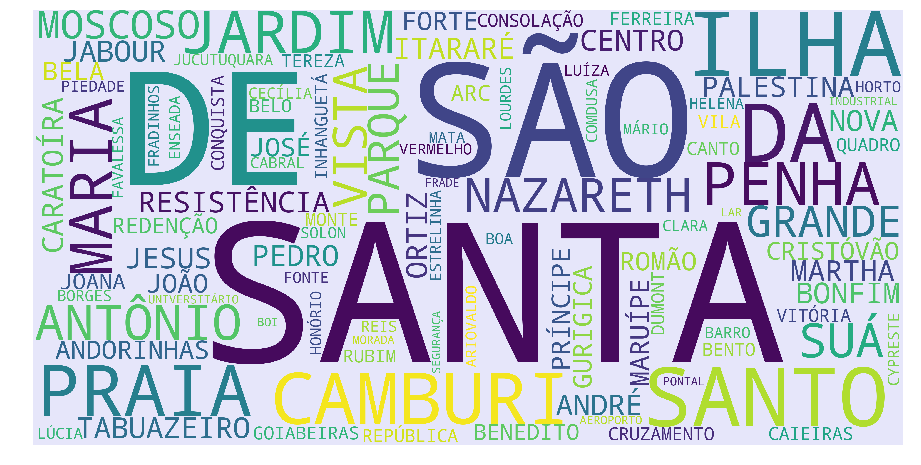

In [45]:
# Create a wordcloud of the Neighbourhood with Show Up group
shows_neigh ['Neighbourhood'] = shows_neigh['Neighbourhood'].fillna("").astype('str')
title_corpus = ' '.join(shows_neigh ['Neighbourhood'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='lavender', height=2000, width=4000).generate(title_corpus)
# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

*** Top 3 neighborhoods where have the highest number of "Show up" are JARDIM CAMBURI, MARIA ORTIZ and RESISTÊNCIA.***

In [46]:
noshows_neigh = No_ShowUp.groupby("Neighbourhood")["No_show"].count().reset_index(name="count").sort_values("count", ascending=False)
#Show Top 5
noshows_neigh.head(5)

,Neighbourhood,count
38,JARDIM CAMBURI,1465
43,MARIA ORTIZ,1219
36,ITARARÉ,923
58,RESISTÊNCIA,906
10,CENTRO,703


*** Top 3 neighborhoods where have the highest number of "No Show" are JARDIM CAMBURI, MARIA ORTIZ and ITARARE.***

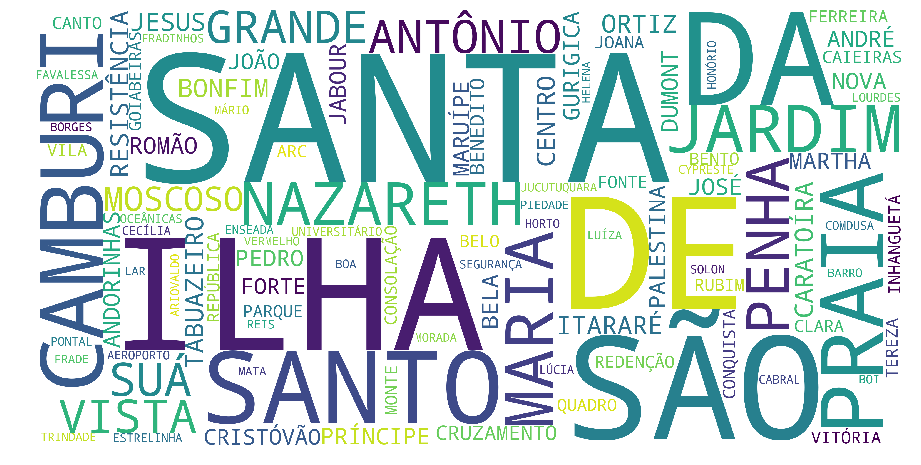

In [47]:
# Create a wordcloud of the Neighbourhood with No Show group
noshows_neigh['Neighbourhood'] = noshows_neigh['Neighbourhood'].fillna("").astype('str')
title_corpus = ' '.join(noshows_neigh['Neighbourhood'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

### Research Question 4: How many "no-shows" and "show up" groups who have received SMS reminders?

### For those who have received SMS reminders:

In [48]:
# No Show up with received SMS
noshow_sms_count = No_ShowUp.query('SMS_received == 1')
a = noshow_sms_count.shape[0]
print(a)

9784


In [49]:
# Show up with received SMS
showup_sms_count = ShowUp.query('SMS_received == 1')
b = showup_sms_count.shape[0]
print(b)

25696


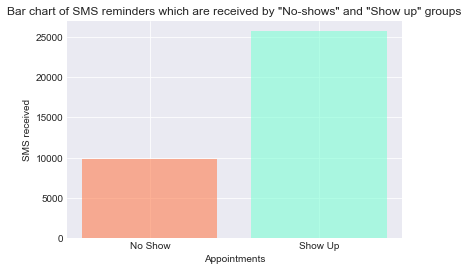

In [50]:
# Plot of "no-shows" and "show up" groups who have received SMS reminders
locations = [1, 2]
height1 = [a, b]
labels = ['No Show', 'Show Up']
bar1 = plt.bar(locations, height1, tick_label=labels, alpha=.6, color=['coral','aquamarine'])
plt.title('Bar chart of SMS reminders which are received by "No-shows" and "Show up" groups')
plt.xlabel('Appointments')
plt.ylabel('SMS received');

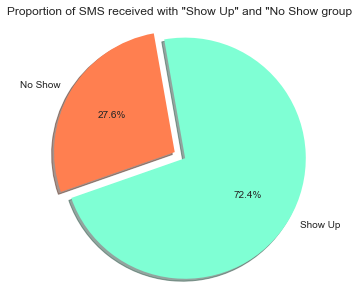

In [51]:
# Plot data
labels = ['No Show', 'Show Up']
sizes = [a, b]
colors = ['coral', 'aquamarine']
explode = (0, 0.1)

# The plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=100)
plt.title('Proportion of SMS received with "Show Up" and "No Show group')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

*** For those patient received SMS reminder, more than 72% patients are showed up the appointment. Alternatively, less than 28% are not showed up the appointment.*** 

### For those who have not received SMS reminders:

In [52]:
# No Show without received SMS
noshow_nosms_count = No_ShowUp.query('SMS_received == 0')
c = noshow_nosms_count.shape[0]
print(c)

12532


In [53]:
# Show up without received SMS
showup_nosms_count = ShowUp.query('SMS_received == 0')
d = showup_nosms_count.shape[0]
print(d)

62503


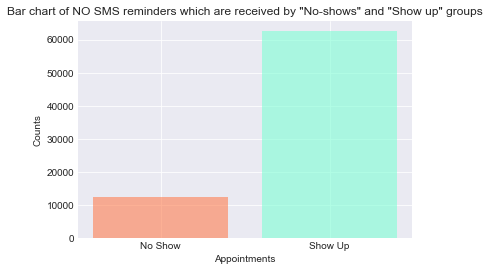

In [54]:
# Plot of "no-shows" and "show up" groups who have not received SMS reminders
locations = [1, 2]
height2 = [c, d]
labels = ['No Show', 'Show Up']
bar2 = plt.bar(locations, height2, tick_label=labels, alpha=.6, color=['coral','aquamarine'])
plt.title('Bar chart of NO SMS reminders which are received by "No-shows" and "Show up" groups')
plt.xlabel('Appointments')
plt.ylabel('Counts');

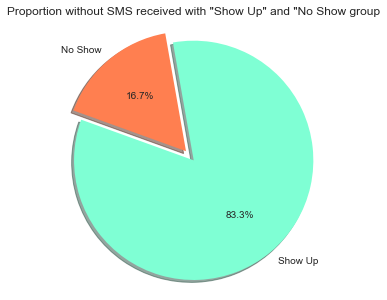

In [55]:
# Plot data
labels = ['No Show', 'Show Up']
sizes = [c, d]
colors = ['coral', 'aquamarine']
explode = (0, 0.1)

# The plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=100)
plt.title('Proportion without SMS received with "Show Up" and "No Show group')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);

*** For those patients without received SMS reminder, more than 83% patients are showed up the appointment. Alternatively, less than 17% are not showed up the appointment.***

### Combined data with and w/o received SMS reminder in no-shows" and "show up" groups

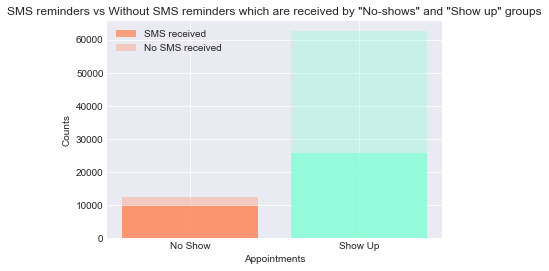

In [56]:
# Plot of "no-shows" and "show up" groups who have received SMS reminders
locations = [1, 2]
height1 = [a, b]
height2 = [c, d]
labels1 = ['No Show SMS', 'Show Up SMS']
labels2 = ['No Show', 'Show Up']
bar1 = plt.bar(locations, height1, tick_label=labels1, alpha=.7, color=['coral','aquamarine'])
bar2 = plt.bar(locations, height2, tick_label=labels2, alpha=.3, color=['coral','aquamarine'])
plt.title('SMS reminders vs Without SMS reminders which are received by "No-shows" and "Show up" groups')
plt.xlabel('Appointments')
plt.ylabel('Counts')
plt.legend([bar1, bar2], ['SMS received', 'No SMS received']);

*** No matter the patients received with and without SMS reminder, most patients will show up their appointment. ***

### Research Question 5: Do scheduled or appointment no-shows occur on specific days of the week?

### Scheduled Day of the Week with No-show

In [57]:
# Scheduled day of week with "No-show" Group
ScheduleDow_df = df.groupby('ScheduleDow').No_show.count().sort_values(ascending=False)
ScheduleDow_df

ScheduleDow
Tuesday      26166
Wednesday    24262
Monday       23079
Friday       18913
Thursday     18071
Saturday        24
Name: No_show, dtype: int64

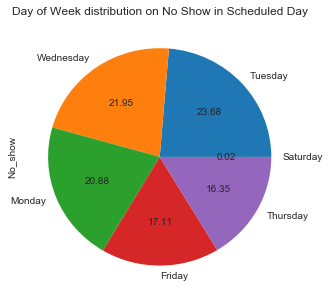

In [58]:
# Pie Plot 
ScheduleDow_df.plot.pie(figsize=(5,5),title = 'Day of Week distribution on No Show in Scheduled Day', autopct='%.2f');

*** Top Three "Day of Week" that most patients are occured "No Show" in Scheduled Day on Monday, Tueday and Wednesday. ***

### Appointment Day of the Week with No-show

In [59]:
AppointmentDow_df = df.groupby('AppointmentDow').No_show.count().sort_values(ascending=False)
AppointmentDow_df

AppointmentDow
Wednesday    25866
Tuesday      25637
Monday       22712
Friday       19017
Thursday     17244
Saturday        39
Name: No_show, dtype: int64

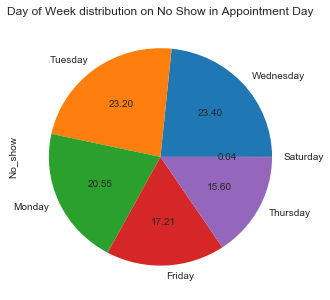

In [60]:
# Pie Plot 
AppointmentDow_df.plot.pie(figsize=(5,5),title = 'Day of Week distribution on No Show in Appointment Day', autopct='%.2f');

*** Top Three "Day of Week" that most patients are occured "No Show" in Appointment Day are also on Monday, Tueday and Wednesday. ***

### Therefore, no matter for Scheduled and Appointment Day, most patients are "No Show" on Monday, Tueday and Wednesday.

### Research Question 6: What is the distribution of patient health of "No show" and "Show up" groups?

### Distribution of patient health in "No show" group

In [61]:
df_new = df.groupby('No_show')['Hypertension','Diabetes', 'Alcoholism', 'Handicap'].sum()
df_new

,Hypertension,Diabetes,Alcoholism,Handicap
No_show,,,,
0,18028,6513,2683,2003
1,3772,1430,677,450


In [62]:
noshow_health = df_new.query("No_show == 1")
noshow_health

,Hypertension,Diabetes,Alcoholism,Handicap
No_show,,,,
1,3772,1430,677,450


In [63]:
noshow_total = df['No_show'].value_counts()[1]
noshow_total

22316

In [64]:
prop_noshow_health = noshow_health / noshow_total
prop_noshow_health

,Hypertension,Diabetes,Alcoholism,Handicap
No_show,,,,
1,0.169027,0.06408,0.030337,0.020165


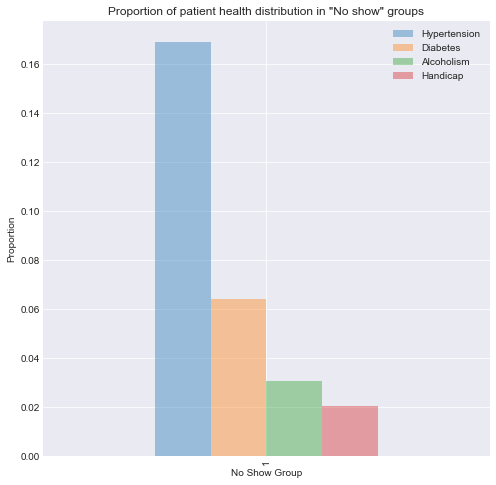

In [65]:
sns.set_style('darkgrid')
prop_noshow_health.plot(kind='bar',figsize=(8,8),alpha=.4,\
                        title='Proportion of patient health distribution in "No show" groups')
plt.xlabel('No Show Group')
plt.ylabel('Proportion');

### Distribution of patient health in "Show up" group

In [66]:
show_health = df_new.query("No_show == 0")
show_health

,Hypertension,Diabetes,Alcoholism,Handicap
No_show,,,,
0,18028,6513,2683,2003


In [67]:
show_total = df['No_show'].value_counts()[0]
show_total

88199

In [68]:
prop_show_health = show_health / show_total
prop_show_health

,Hypertension,Diabetes,Alcoholism,Handicap
No_show,,,,
0,0.204401,0.073844,0.03042,0.02271


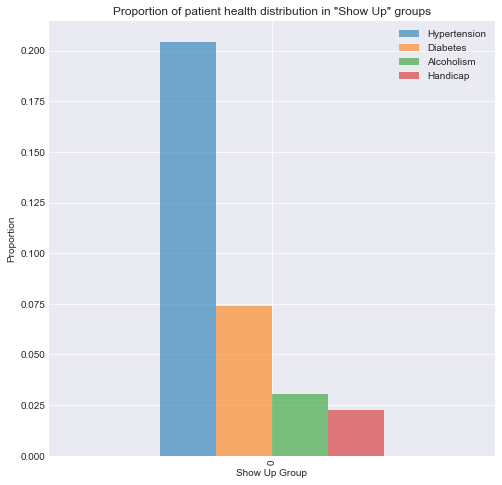

In [69]:
sns.set_style('darkgrid')
prop_show_health.plot(kind='bar',figsize=(8,8),alpha=.6,\
                        title='Proportion of patient health distribution in "Show Up" groups')
plt.xlabel('Show Up Group')
plt.ylabel('Proportion');

*** No matter in "No show" or "Show up" groups, most patients have Hypertension, follow by Diabetes and Alcoholism. ***

### Research Question 7: What is the trend of elapsed time of patients with No show?

In [70]:
# Trend of elasped time within 7 days
wait_noshow = df.groupby('ElapsedDays').sum()['No_show']
wait_noshow.head(10) 

ElapsedDays
-6 days       1
-1 days       4
0 days     1792
1 days     1113
2 days     1602
3 days      642
4 days     1231
5 days      872
6 days     1001
7 days     1309
Name: No_show, dtype: int64

*** Most of the patients (1792 counts) are showed up appointment on scheduled day. Otherwise, most of them (7770 counts) rearranged appoinment and showed up within 1-7 days of scheduled day.Only 5 patients are showed up appointment early than scheduled day ***

### In "No Show" group, elapsed days for appoinments are mostly occurred within 7 days. 

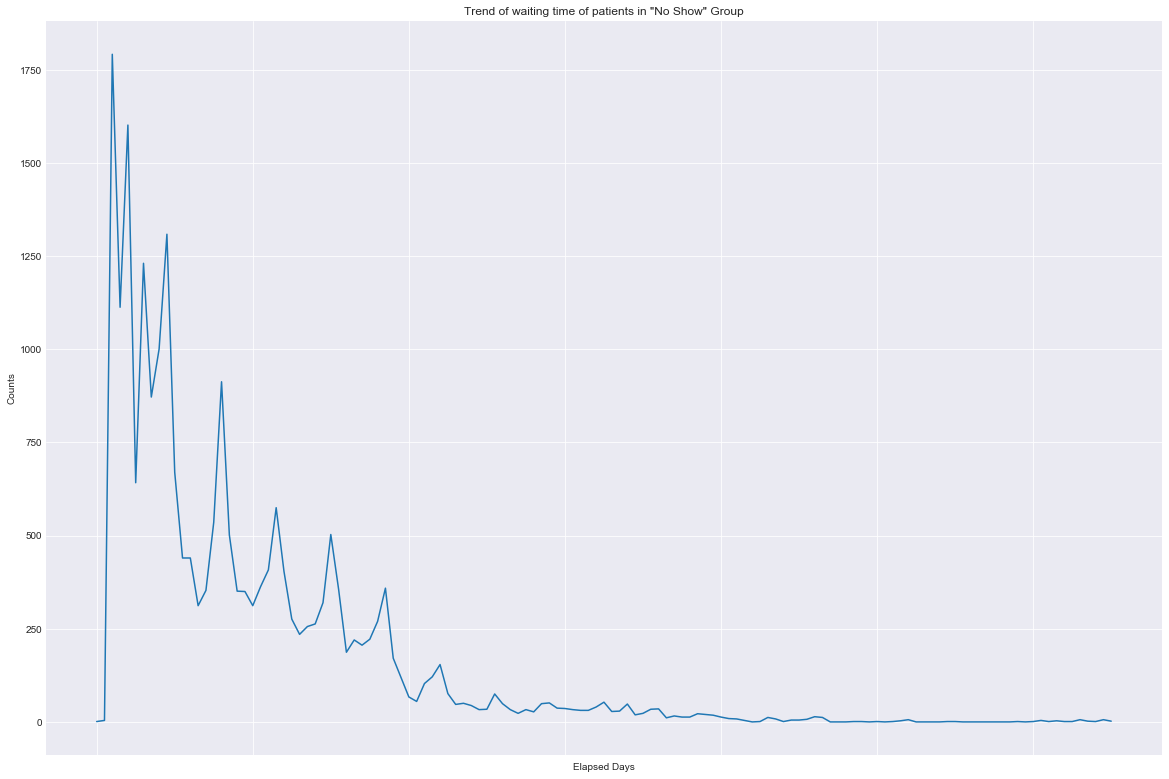

In [71]:
wait_noshow.plot(figsize=(20,15),title='Trend of waiting time of patients in "No Show" Group')
plt.xlabel('Elapsed Days')
plt.ylabel('Counts');

<a id='conclusions'></a>
## Conclusions


* There are nearly **80%** of patients show up their appointment. And **20%** of patients did not show up their appointment.

* The average age of "No show" and "Show up" patients are **34.3 and 37.8**, respectively.

* Top 3 neighborhoods of "Show up" are **JARDIM CAMBURI, MARIA ORTIZ and RESISTÊNCIA**. While Top 3 neighborhoods of "No Show" are **JARDIM CAMBURI, MARIA ORTIZ and ITARARE.**

* No matter the patients received with and without SMS reminder, most patients will show up their appointment.

* In both Scheduled and Appointment Day, most patients are "No Show" on **Monday, Tueday and Wednesday**.

* For both "No show" or "Show up" groups, most patients have **Hypertension, follow by Diabetes and Alcoholism**. 

* In "No Show" group, elapsed days for appoinments are mostly occurred **within 7 days**.


### Limitation of current dataset
In order to investigate more details about No-show groups patients, we can incorporated with the following datasets.
* **Socioeconomic Status Data**
: Socioeconomic status has been a powerful determinant of health. Some of the metrics of socioeconomic status include: occupation, household income and level of education attained, etc. We can then investigate the impact of socioeconomic status on No-show patients.
* **Private Insurance Data**
: We can also examine the impact of having private insurance on no-show patients likelihood.

### Future Work
* To develop a predictive model for patient no-shows, and ultimately to reduce the negative impact of no-shows.

* A **logistic regression** will be applied to no-show predictive model, which was used to determine no-show threshold that calculates a predicted show up/no-show status for better future planning.
